In [165]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)
print(1)

Tensorflow version: 2.16.1
1


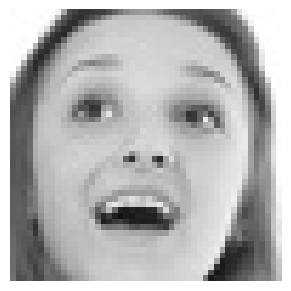

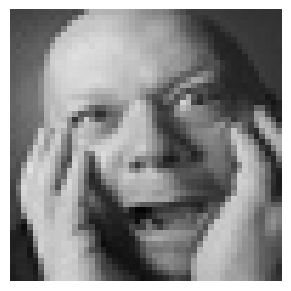

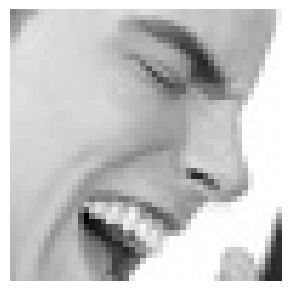

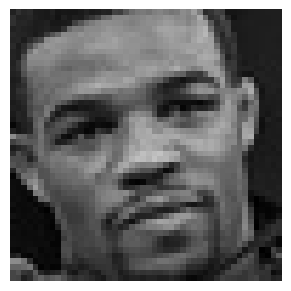

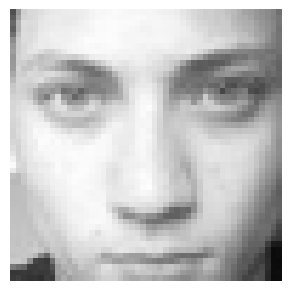

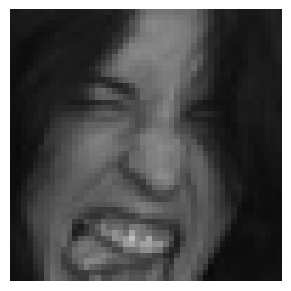

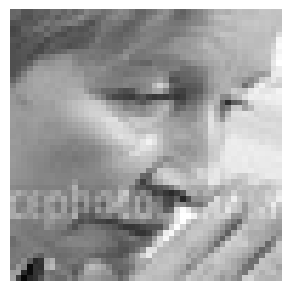

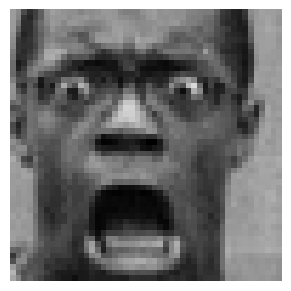

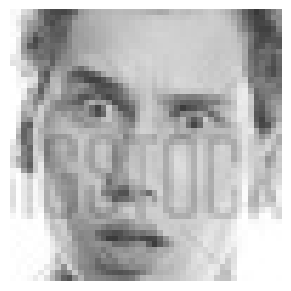

In [166]:
images = glob("train/**/**")
# images = glob("Emotional_d/test")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [167]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [168]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [169]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [170]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [171]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [172]:

# epochs = 15
# steps_per_epoch = train_generator.n//train_generator.batch_size
# validation_steps = validation_generator.n//validation_generator.batch_size

# checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
# reduce_lr = ReduceLROnPlateau(monitor = 'val_loss' , factor = 0.1, patience = 2, min_lr = 0.00001)
# callbacks = [checkpoint,reduce_lr] 
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [173]:

history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks
)


Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.3203 - loss: 1.8171
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 120s 257ms/step - accuracy: 0.3204 - loss: 1.8168 - val_accuracy: 0.4574 - val_loss: 1.4166
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:22 186ms/step - accuracy: 0.5469 - loss: 1.3290
Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.5469 - loss: 0.6660 - val_accuracy: 0.7000 - val_loss: 0.6996
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.4744 - loss: 1.3773
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 91s 203ms/step - accuracy: 0.4744 - loss: 1.3772 - val_accuracy: 0.4795 - val_loss: 1.3440
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:22 185ms/step - accuracy: 0.5312 - loss: 1.2738
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.5312 - loss: 0.6383 - val_a

In [174]:
model.evaluate(validation_generator) 

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5565 - loss: 1.1780


[1.188102126121521, 0.5521036386489868]

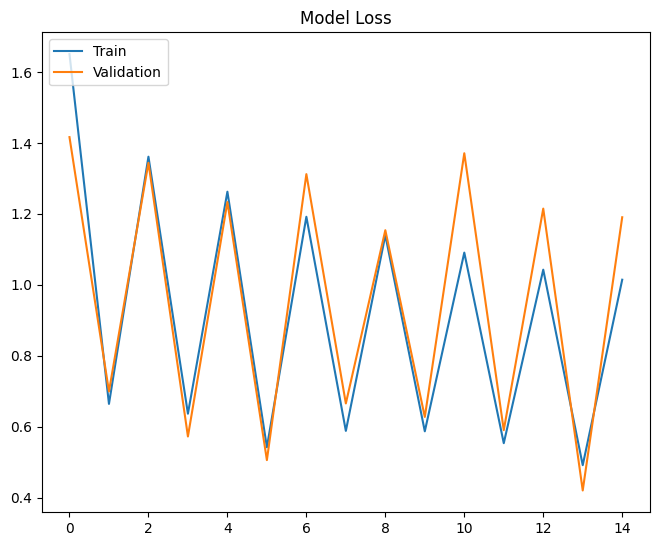

In [175]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.legend(['Train','Validation'],loc = 'upper left')
# plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

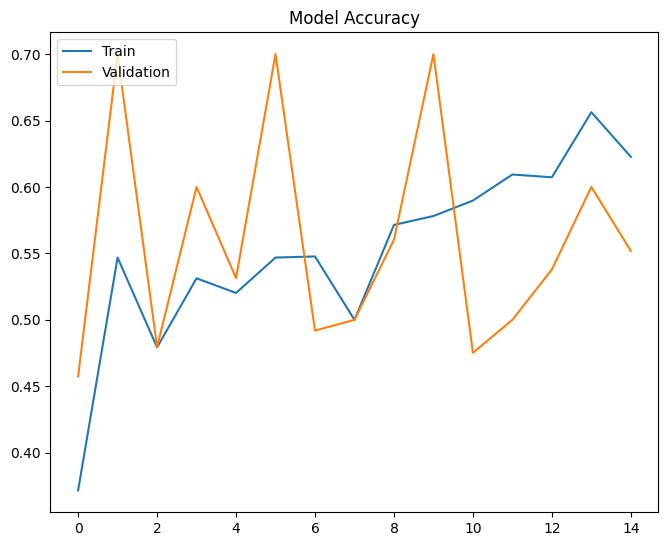

In [176]:

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.legend(['Train','Validation'],loc = 'upper left')
# plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [177]:
model_json = model.to_json()
with open("model_a1.json","w") as json_file:
    json_file.write(model_json) 

In [60]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *

from sklearn import metrics

from tensorflow.keras.models import model_from_json
from PIL import Image, ImageTk
import numpy as np
import cv2
print(1)

1


In [61]:
print(1)
def FacialExpressionModel(json_file, weights_file):
    with open(json_file,"r") as file:
        loaded_model_json = file.read()
        model = model_from_json(loaded_model_json)

    model.load_weights(weights_file)
    model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

    return model

1


In [62]:
top =tk.Tk()
top.geometry('800x600')
top.title('Emotion Detector')
top.configure(background='#CDCDCD')
print(1)

1


In [63]:
label1 = Label(top, background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
print(1)

1


In [64]:
# facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# model = FacialExpressionModel("model_a.json","model_weights1.h5")
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model_a1.json","model_weights.weights.h5")
EMOTIONS_LIST = ["Angry","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
print(1)

1


In [65]:
def Detect(file_path):
    global Label_packed

    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = facec.detectMultiScale(gray_image,1.3,5)
    try:
        for (x,y,w,h) in faces:
            fc = gray_image[y:y+h,x:x+w]
            roi = cv2.resize(fc,(48,48))
            pred = EMOTIONS_LIST[np.argmax(model.predict(roi[np.newaxis,:,:,np.newaxis]))]
        print("Predicted Emotion is" + pred)
        label1.configure(foreground="#011638",text = pred)
    except:
        label1.configure(foreground="#011638",text = "Unable to detect")
print(1)

1


In [66]:
def show_Detect_button(file_path):
    detect_b = Button(top,text="Detect Emotion", command= lambda: Detect(file_path),padx=10,pady=5)
    detect_b.configure(background="#364156",foreground='white',font=('arial',10,'bold'))
    detect_b.place(relx =0.79,rely=0.46)
print(1)

1


In [67]:
def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25), (top.winfo_height()/2.25)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label1.configure(text='')
        show_Detect_button(file_path)
    except:
        pass
print(1)

1


In [68]:
# Create and configure the button
upload = tk.Button(top, text="Upload Image", command=upload_image, padx=10, pady=5)
upload.configure(background="#364156", foreground='white', font=('arial', 20, 'bold'))
upload.pack(side='bottom', pady=50)
sign_image.pack(side='bottom', expand='True')
label1.pack(side='bottom', expand='True')
heading = Label(top,text='Emotion Detector',pady=20,font=('arial',25,'bold'))
heading.configure(background='#CDCDCD',foreground="#364156")
heading.pack() 
top.mainloop() 
print(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Predicted Emotion isHappy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Emotion isNeutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Emotion isNeutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Emotion isNeutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Emotion isNeutral
1
